In [1]:
import PIL
import tensorflow as tf
from keras import Sequential, layers
import keras
import os
import matplotlib.pyplot as plt
import numpy as np



Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


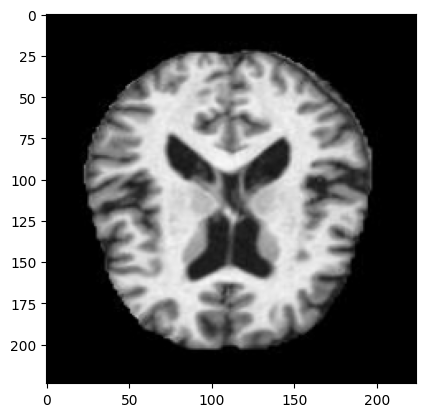

In [26]:
img_size = (224,224)

train_ds = keras.utils.image_dataset_from_directory(
    directory='Alzheimer_s Dataset/train',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=img_size)
validation_ds = keras.utils.image_dataset_from_directory(
    directory='Alzheimer_s Dataset/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=img_size)

# batch_1=train_ds.take(1)
for images, labels in train_ds.take(1):
  for i in range(9):
    # ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[i]])
    # plt.axis("off")




In [3]:
class_names = train_ds.class_names
print(class_names)

normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
0.0 0.97201437


In [18]:
num_classes = len(class_names)

model_MN = tf.keras.applications.MobileNet(
    input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.001,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)
model_MN.trainable = False

model = keras.Sequential([
  # layers.Rescaling(1./255, input_shape=(176, 208, 3)),
  # layers.Conv2D(16, (3,3),1, padding='same', activation='relu', input_shape=(176, 208, 3)),
  # layers.MaxPooling2D(),
  # layers.Conv2D(32, (3,3),1, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Conv2D(16, (3,3),1, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  # layers.Flatten(),
  # layers.Dense(128, activation='relu'),
    model_MN,
  layers.Dense(num_classes)
])

model.build(img_size)


In [19]:
model.compile(optimizer='adam',loss=tf.losses.BinaryCrossentropy(),
              # loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functi  (None, 1000)              4253864   
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 4)                 4004      
                                                                 
Total params: 4257868 (16.24 MB)
Trainable params: 4004 (15.64 KB)
Non-trainable params: 4253864 (16.23 MB)
_________________________________________________________________


In [21]:
epochs=2
history = model.fit(
  train_ds,
  validation_data=validation_ds,
  epochs=epochs
)



Epoch 1/2
 51/161 [========>.....................] - ETA: 1:21 - loss: 1.1145 - accuracy: 0.1550

KeyboardInterrupt: 

In [8]:
print("Evaluate on test data")
results = model.evaluate(validation_ds, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
40/40 [==============================] - 30s 720ms/step - loss: 0.9644 - accuracy: 0.5004
test loss, test acc: [0.9644464254379272, 0.5003909468650818]


IndexError: tuple index out of range

In [27]:
from PIL import Image

img_path = "Alzheimer_s Dataset/test/ModerateDemented/27.jpg"
img = Image.open(img_path)
# img_size
img_resized = img.resize(img_size)
np_img = np.asarray(img_resized)

(224, 224)

In [12]:
predictions = model.predict(np.asarray(img_resized))

ValueError: in user code:

    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\yugio\School\Sophmore\BME240\BME240_ML\venv\lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'mobilenet_1.00_224' (type Functional).
    
    Input 0 of layer "conv1" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (32, 224)
    
    Call arguments received by layer 'mobilenet_1.00_224' (type Functional):
      • inputs=tf.Tensor(shape=(32, 224), dtype=float32)
      • training=False
      • mask=None
